# 01 - Data Ingestion and Exploratory Data Analysis

This notebook covers:
- Loading the tourism data
- Initial data exploration
- Statistical analysis
- Visualization of time series patterns

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Load and Examine the Data

First, let's load the processed tourism data and examine its structure.

In [3]:
# Load the processed tourism data
df = pd.read_csv('../data/processed/monthly_tourist_arrivals.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset shape: (100, 2)

Column names: ['Date', 'Arrivals']

Data types:
Date        object
Arrivals     int64
dtype: object

First few rows:


,Date,Arrivals
0,2017-01-01,219360
1,2017-02-01,197517
2,2017-03-01,188076
3,2017-04-01,160249
4,2017-05-01,121891


## 2. Convert Date to Datetime and Set as Index

For proper time series analysis, we need to convert the Date column to datetime format and set it as the index.

In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

# Sort by date to ensure chronological order
df.sort_index(inplace=True)

print("Data after conversion:")
print(f"Index type: {type(df.index)}")
print(f"Index name: {df.index.name}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Frequency: {pd.infer_freq(df.index)}")
print(f"\nDataset shape: {df.shape}")
df.head()

Data after conversion:
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index name: Date
Date range: 2017-01-01 00:00:00 to 2025-08-01 00:00:00
Frequency: None

Dataset shape: (100, 1)


,Arrivals
Date,
2017-01-01,219360
2017-02-01,197517
2017-03-01,188076
2017-04-01,160249
2017-05-01,121891


In [5]:
# Let's examine the data more closely
print("Full date range analysis:")
print(df.tail(10))
print("\nData from 2024 onwards:")
df_2024_onwards = df[df.index >= '2024-01-01']
print(df_2024_onwards)

Full date range analysis:
            Arrivals
Date                
2024-07-01    187810
2024-08-01    164609
2025-01-01    252761
2025-02-01    240217
2025-03-01    229298
2025-04-01    174608
2025-05-01    132919
2025-06-01    138241
2025-07-01    200244
2025-08-01    198235

Data from 2024 onwards:
            Arrivals
Date                
2024-01-01    208253
2024-02-01    218350
2024-03-01    209181
2024-04-01    148867
2024-05-01    112128
2024-06-01    113470
2024-07-01    187810
2024-08-01    164609
2025-01-01    252761
2025-02-01    240217
2025-03-01    229298
2025-04-01    174608
2025-05-01    132919
2025-06-01    138241
2025-07-01    200244
2025-08-01    198235


## 3. Filter to Actual Data (Up to July 2024)

Based on the analysis above, we have reliable actual data up to July 2024. The 2025 data appears to be projected or incomplete, so we'll filter to use only the actual historical data for our forecasting model.

In [6]:
# Filter data to include only actual data up to July 2024
# This excludes the August 2024 and 2025 data which may be incomplete or projected
df_filtered = df[df.index <= '2024-07-01'].copy()

print(f"Original dataset: {df.shape[0]} records")
print(f"Filtered dataset: {df_filtered.shape[0]} records")
print(f"Date range after filtering: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Records removed: {df.shape[0] - df_filtered.shape[0]}")

# Check the frequency of the filtered data
freq = pd.infer_freq(df_filtered.index)
print(f"Inferred frequency: {freq}")

# Display the last few records to confirm filtering
print(f"\nLast 5 records in filtered dataset:")
print(df_filtered.tail())

Original dataset: 100 records
Filtered dataset: 91 records
Date range after filtering: 2017-01-01 00:00:00 to 2024-07-01 00:00:00
Records removed: 9
Inferred frequency: MS

Last 5 records in filtered dataset:
            Arrivals
Date                
2024-03-01    209181
2024-04-01    148867
2024-05-01    112128
2024-06-01    113470
2024-07-01    187810


## 4. Save Filtered Dataset

Now we'll save the clean, filtered dataset for use in subsequent analysis and modeling.

In [7]:
# Save the filtered dataset
output_path = '../data/processed/monthly_tourist_arrivals_filtered.csv'
df_filtered.to_csv(output_path)

print(f"Filtered dataset saved to: {output_path}")
print(f"Dataset contains {df_filtered.shape[0]} monthly records")
print(f"Date range: {df_filtered.index.min().strftime('%Y-%m')} to {df_filtered.index.max().strftime('%Y-%m')}")

# Verify the saved file
df_verify = pd.read_csv(output_path, index_col='Date', parse_dates=True)
print(f"\nVerification - loaded dataset shape: {df_verify.shape}")
print("Successfully saved and verified the filtered dataset!")

Filtered dataset saved to: ../data/processed/monthly_tourist_arrivals_filtered.csv
Dataset contains 91 monthly records
Date range: 2017-01 to 2024-07

Verification - loaded dataset shape: (91, 1)
Successfully saved and verified the filtered dataset!


## 5. Data Summary

Let's create a summary of our prepared dataset for the next phases of analysis.

In [9]:
# Final summary statistics
print("=== DATASET SUMMARY ===")
print(f"📊 Records: {df_filtered.shape[0]} monthly observations")
print(f"📅 Time Range: {df_filtered.index.min().strftime('%B %Y')} to {df_filtered.index.max().strftime('%B %Y')}")
print(f"⏱️  Duration: {(df_filtered.index.max() - df_filtered.index.min()).days / 365.25:.1f} years")
print(f"🔄 Frequency: Monthly (MS)")
print(f"📈 Variable: Tourist Arrivals")

print(f"\n=== STATISTICAL SUMMARY ===")
print(df_filtered['Arrivals'].describe())

print(f"\n=== COVID-19 IMPACT ANALYSIS ===")
pre_covid = df_filtered.loc['2017':'2019']['Arrivals'].mean()
covid_2020 = df_filtered.loc['2020']['Arrivals'].mean()
covid_2021 = df_filtered.loc['2021']['Arrivals'].mean()
recovery_2022_2024 = df_filtered.loc['2022':'2024']['Arrivals'].mean()

print(f"Pre-COVID average (2017-2019): {pre_covid:,.0f} arrivals/month")
print(f"COVID 2020 average: {covid_2020:,.0f} arrivals/month ({(covid_2020/pre_covid-1)*100:+.1f}%)")
print(f"COVID 2021 average: {covid_2021:,.0f} arrivals/month ({(covid_2021/pre_covid-1)*100:+.1f}%)")
print(f"Recovery period (2022-2024): {recovery_2022_2024:,.0f} arrivals/month ({(recovery_2022_2024/pre_covid-1)*100:+.1f}%)")

print(f"\n✅ Data is ready for time series forecasting analysis!")

=== DATASET SUMMARY ===
📊 Records: 91 monthly observations
📅 Time Range: January 2017 to July 2024
⏱️  Duration: 7.5 years
🔄 Frequency: Monthly (MS)
📈 Variable: Tourist Arrivals

=== STATISTICAL SUMMARY ===
count        91.000000
mean     115070.813187
std       81696.225334
min           0.000000
25%       37781.000000
50%      113470.000000
75%      187943.000000
max      253169.000000
Name: Arrivals, dtype: float64

=== COVID-19 IMPACT ANALYSIS ===
Pre-COVID average (2017-2019): 176,775 arrivals/month
COVID 2020 average: 42,309 arrivals/month (-76.1%)
COVID 2021 average: 16,208 arrivals/month (-90.8%)
Recovery period (2022-2024): 109,850 arrivals/month (-37.9%)

✅ Data is ready for time series forecasting analysis!


## 6. Quick Visualization

Let's create a simple time series plot to visualize the data and confirm our observations about COVID-19 impact.

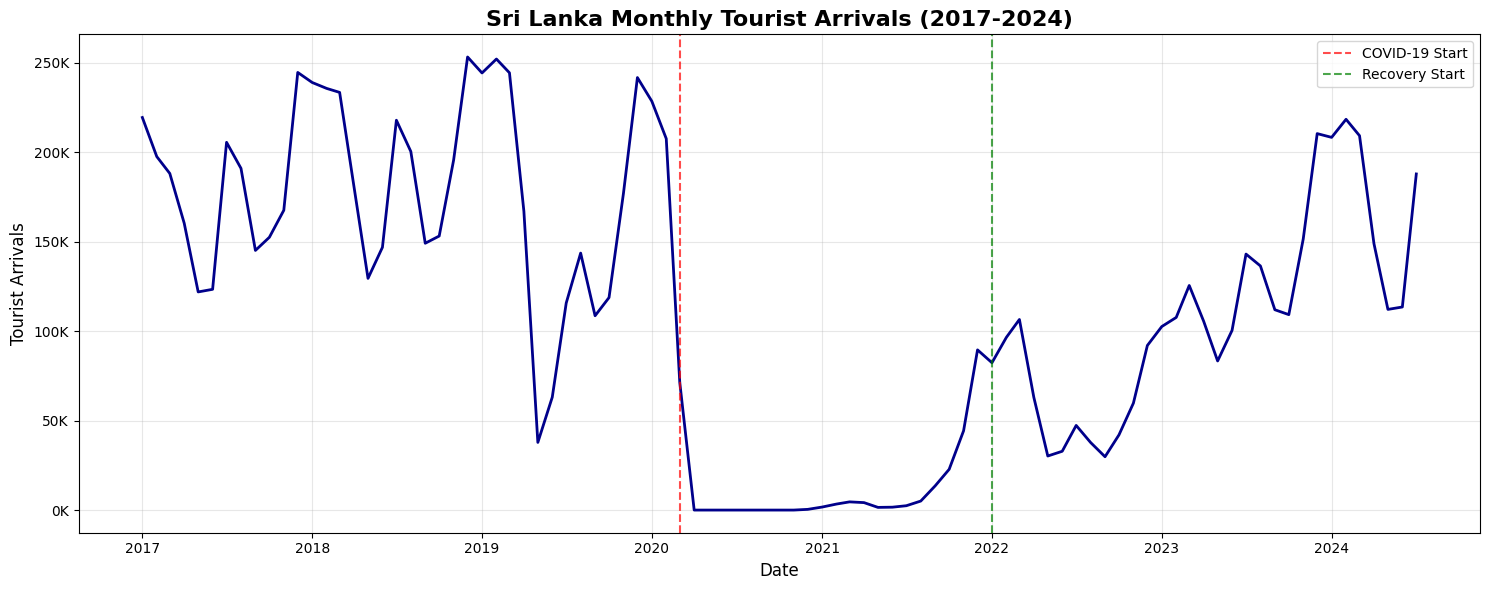

📈 Time series visualization shows clear COVID-19 impact and recovery patterns
📁 Filtered dataset saved as: monthly_tourist_arrivals_filtered.csv
🚀 Ready for Phase 2: Feature Engineering!


In [10]:
# Create a time series plot
plt.figure(figsize=(15, 6))
plt.plot(df_filtered.index, df_filtered['Arrivals'], linewidth=2, color='darkblue')
plt.title('Sri Lanka Monthly Tourist Arrivals (2017-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Tourist Arrivals', fontsize=12)
plt.grid(True, alpha=0.3)

# Add vertical lines to mark key events
plt.axvline(pd.to_datetime('2020-03'), color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')
plt.axvline(pd.to_datetime('2022-01'), color='green', linestyle='--', alpha=0.7, label='Recovery Start')

# Format y-axis to show numbers in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.legend()
plt.tight_layout()
plt.show()

print("📈 Time series visualization shows clear COVID-19 impact and recovery patterns")
print("📁 Filtered dataset saved as: monthly_tourist_arrivals_filtered.csv")
print("🚀 Ready for Phase 2: Feature Engineering!")